In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### read data and remove the first row

In [128]:
transactions=pd.read_excel('kpmgfinal.xlsx',sheet_name="Transactions",skiprows=[0])
new_customerlist=pd.read_excel('kpmgfinal.xlsx',sheet_name="NewCustomerList")
demographic=pd.read_excel('kpmgfinal.xlsx',sheet_name="CustomerDemographic",skiprows=[0])
address=pd.read_excel('kpmgfinal.xlsx',sheet_name="CustomerAddress",skiprows=[0])


## Exploratory Analysis

In [129]:
transactions.shape

(20000, 13)

In [130]:
transactions.head()



,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


### new_customerlist


In [131]:
new_customerlist.shape

(1000, 22)

In [132]:
new_customerlist.head()


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,4500,QLD,Australia,6,1.04,1.3000,1.6250,1.38125,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,2113,NSW,Australia,11,1.02,1.0200,1.2750,1.08375,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,3505,VIC,Australia,5,0.55,0.5500,0.5500,0.55000,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,4814,QLD,Australia,1,0.81,1.0125,1.0125,1.01250,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,2093,NSW,Australia,9,0.93,0.9300,1.1625,1.16250,4,1.703125



### In this table, some of columns don't have column names, so we drop these columns

In [133]:
new_customerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Rank', 'Value'],
      dtype='object')

In [134]:
new_customerlist.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19'],axis=1,inplace=True)

### customer demographic table

In [135]:
demographic.shape

(4000, 13)

In [136]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [137]:
demographic['age']=2020-demographic['DOB'].apply(lambda x:x.year)
demographic['age'].describe()

count    3913.000000
mean       42.969333
std        12.796387
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max       177.000000
Name: age, dtype: float64


### customer address table

In [139]:
address.shape

(3999, 6)

In [140]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### Data Cleaning -- Missing Values

#### Transactions table

In [141]:
transactions.isna().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

 - percentage of Missing values is really small, so we can drop the null values

In [142]:
transactions.dropna(axis=0,how='any',inplace=True)

#### new customer table

In [143]:
new_customerlist.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

 - All missing values are categorical variables, fill them by 'None'

In [144]:
new_customerlist.fillna('None')

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12 00:00:00,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22 00:00:00,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28 00:00:00,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21 00:00:00,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
5,Druci,Brandli,Female,39,1951-04-29 00:00:00,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.671875
6,Rutledge,Hallt,Male,23,1976-10-06 00:00:00,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875
7,Nancie,Vian,Female,74,1972-12-27 00:00:00,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.656250
8,Duff,Karlowicz,Male,50,1972-04-28 00:00:00,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250
9,Barthel,Docket,Male,72,1985-08-02 00:00:00,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.640625


### calculate age and find median of age then fill missing values by median

In [18]:
age=2020-new_customerlist['DOB'].apply(lambda x:x.year)
new_customerlist['age']=age
new_customerlist['age'].median()

48.0

In [19]:
new_customerlist['age']=new_customerlist['age'].fillna(48)

In [20]:
new_customerlist.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
age                                      0
dtype: int64


- age distribution in new customer list & demographic table

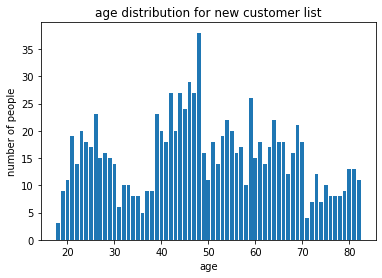

In [114]:
plt.title('age distribution for new customer list')
plt.bar(new_customerlist['age'].value_counts().index,new_customerlist['age'].value_counts().values)
plt.xlabel('age')
plt.ylabel('number of people')
plt.show()


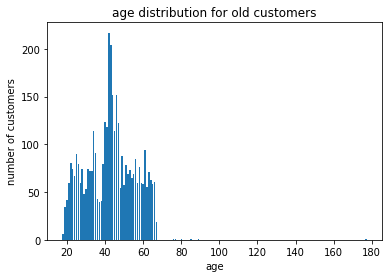

In [191]:
plt.bar(demographic['age'].value_counts().index,demographic['age'].value_counts().values)
plt.title('age distribution for old customers')
plt.ylabel('number of customers')
plt.xlabel('age')
plt.show()

 - convert to integer

In [22]:
new_customerlist['age']=new_customerlist['age'].astype(int)

#### Demogrphic Table

In [23]:
demographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
age                                     87
dtype: int64

- Drop default col

In [24]:

demographic.drop(['default'],axis=1,inplace=True)

 - Fill Null Values by 'None' for 'last_name' 'job_title','job_industry_category'

In [25]:
demographic[['last_name','job_title','job_industry_category']]=demographic[['last_name','job_title','job_industry_category']].fillna('None')

#### Customer Address Table

In [27]:
address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### There's no missing values in address table. Good!

### Data Cleaning-- Consistency & Accuracy

#### Transactions Table

##### 1. Round demical place for list_price & standard_cost and make sure all values have the same demical place


In [28]:
transactions=transactions.round({'list_price':2,'standard_cost':2})

#### Customer Demographics Table



##### 1.consistency of gender col

In [29]:
demographic.gender.value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [30]:
demographic['gender'].replace({'F':'Female','M':'Male','Femal':'Female'},inplace=True)

##### 2. Delete the customer that borned in 1843

In [31]:

demographic.drop(demographic[demographic.DOB=='1843-12-21'].index,inplace=True)

##### 3. Drop default col

#### New customer Table

##### 1. Roud number of demical place

In [32]:

new_customerlist=new_customerlist.round({'Value':2})

##### 2. Consistency of data type for all values in a column

In [33]:
new_customerlist['property_valuation']=new_customerlist['property_valuation'].astype(int)


#### Customer Adress Table

##### 1. Consistency of State col


In [34]:
address['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

## RFM Model

### 1. R

In [145]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [146]:
from datetime import datetime 
current=datetime.utcnow()
current_date=pd.to_datetime(current)-transactions['transaction_date']

#### F

In [147]:
f_table=pd.DataFrame(transactions.groupby('customer_id')['transaction_id'].count()).rename(columns={"transaction_id":'freq'})

#### M

In [148]:
m_table=pd.DataFrame(transactions.groupby('customer_id')['list_price'].sum()).rename(columns={"list_price":"monetary value"})

####  RFM Table

In [154]:
rfm_table=pd.merge(f_table,m_table,on='customer_id',how='outer')
rfm_table['recency']=current_date
rfm_table['recency']=rfm_table['recency'].dt.days

In [155]:
rfm_table

,freq,monetary value,recency
customer_id,,,
1,11,9084.45,1127.0
2,3,4149.07,979.0
3,7,9525.22,1025.0
4,2,1047.72,994.0
5,6,5903.20,1201.0
6,5,5931.69,1157.0
7,3,995.38,1072.0
8,9,9933.29,1046.0
9,6,5357.55,1026.0


In [156]:
lst=[]
for i in rfm_table['recency'].values:
    if i<= 984.0: 
       lst.append(1)
    elif i<=1077.0 and i>984.0:
       lst.append(2) 
    elif i<=1168.0 and i>1077.0:
       lst.append(3)
    else:
       lst.append(4) 


In [157]:
lst_m=[]
for i in rfm_table['monetary value'].values:
    if i<= 4049.81:
       lst_m.append(4)
    elif i<=5868.1849999999995 and i>4049.81:
       lst_m.append(3) 
    elif i<=8008.922500000001 and i>5868.1849999999995:
       lst_m.append(2)
    else:
       lst_m.append(1) 
lst_f=[]
for i in rfm_table['freq'].values:
    if i<= 4.0:
       lst_f.append(4)
    elif i<=5.0 and i>4.0:
       lst_f.append(3) 
    elif i<=7.0 and i>5.0:
       lst_f.append(2)
    else:
       lst_f.append(1) 

In [158]:
rfm_table['r_score']=lst
rfm_table['m_score']=lst_m
rfm_table['f_score']=lst_f

In [159]:
rfm_table['total_score']=rfm_table['r_score'].astype(str)+rfm_table['f_score'].astype(str)+rfm_table['m_score'].astype(str)


####  Customer Segmentation

In [160]:
l=[]
for i in rfm_table['total_score'].values:
    if i=='111':
        l.append('Best Customers')
    elif i=='311':
        l.append('Almost Lost')
    elif i=='411':
        l.append('Lost Customers')
    elif i=='444':
        l.append('Lost Cheap Customers')
    elif i[-1]=='1' and i!='311' and '411' and '111':
        l.append('Big Spenders')
    elif i[1]=='1' and i!='111'and'311'and'411':
        l.append('Loyal Customers')
    else:
        l.append('Others')

In [161]:
rfm_table['segment']=l
rfm_table

,freq,monetary value,recency,r_score,m_score,f_score,total_score,segment
customer_id,,,,,,,,
1,11,9084.45,1127.0,3,1,1,311,Almost Lost
2,3,4149.07,979.0,1,3,4,143,Others
3,7,9525.22,1025.0,2,1,2,221,Big Spenders
4,2,1047.72,994.0,2,4,4,244,Others
5,6,5903.20,1201.0,4,2,2,422,Others
6,5,5931.69,1157.0,3,2,3,332,Others
7,3,995.38,1072.0,2,4,4,244,Others
8,9,9933.29,1046.0,2,1,1,211,Big Spenders
9,6,5357.55,1026.0,2,3,2,223,Others


In [162]:
rfm_table.segment.value_counts()

Others                  2290
Big Spenders             459
Lost Cheap Customers     209
Lost Customers           157
Best Customers           129
Almost Lost              128
Loyal Customers          120
Name: segment, dtype: int64

In [163]:
rfm_table[['segment','total_score']].loc[rfm_table.total_score=='311']

,segment,total_score
customer_id,,
1,Almost Lost,311
41,Almost Lost,311
48,Almost Lost,311
144,Almost Lost,311
168,Almost Lost,311
171,Almost Lost,311
198,Almost Lost,311
204,Almost Lost,311
234,Almost Lost,311


In [164]:
seg_table=pd.DataFrame(rfm_table.groupby('segment')['segment'].count()).rename(columns={'segment':'number of customers'})

In [165]:
seg_table.drop(index='Others',inplace=True)

In [166]:
seg_table

,number of customers
segment,
Almost Lost,128
Best Customers,129
Big Spenders,459
Lost Cheap Customers,209
Lost Customers,157
Loyal Customers,120


###  OK, customer segmentation for old customers is done!

In [196]:
rfm_final=pd.merge(rfm_table,demographic,on='customer_id',how='left')

In [211]:
rfm_final.corr()

,customer_id,freq,monetary value,recency,r_score,m_score,f_score,past_3_years_bike_related_purchases,tenure,age
customer_id,1.000000,-0.025414,-0.009123,-0.021862,-0.025049,0.012353,0.033285,-0.010875,-0.017608,-0.016094
freq,-0.025414,1.000000,0.866761,0.009906,0.004361,-0.810943,-0.929376,-0.001310,-0.001828,0.006966
monetary value,-0.009123,0.866761,1.000000,-0.005318,-0.006746,-0.921349,-0.809200,0.007365,-0.009140,0.006053
recency,-0.021862,0.009906,-0.005318,1.000000,0.966677,0.007438,-0.005661,0.020998,0.030091,0.008305
r_score,-0.025049,0.004361,-0.006746,0.966677,1.000000,0.010382,-0.001709,0.032590,0.030028,0.010686
m_score,0.012353,-0.810943,-0.921349,0.007438,0.010382,1.000000,0.810653,-0.005423,0.000573,-0.018248
f_score,0.033285,-0.929376,-0.809200,-0.005661,-0.001709,0.810653,1.000000,0.006941,-0.000937,-0.019158
past_3_years_bike_related_purchases,-0.010875,-0.001310,0.007365,0.020998,0.032590,-0.005423,0.006941,1.000000,-0.012789,-0.029482
tenure,-0.017608,-0.001828,-0.009140,0.030091,0.030028,0.000573,-0.000937,-0.012789,1.000000,0.433220
age,-0.016094,0.006966,0.006053,0.008305,0.010686,-0.018248,-0.019158,-0.029482,0.433220,1.000000


In [208]:
rfm_final[['age']].loc[rfm_final.segment=='Best Customers'].describe()

,age
count,125.000000
mean,42.776000
std,13.093254
min,19.000000
25%,34.000000
50%,42.000000
75%,51.000000
max,89.000000


####  For age of  best customers, mean is 42.77, that means people with age around 42.77 have the highest value



## Then we need to analyze new customer list table

- Compare to old customers table, new customer list table doesn't have transaction history
- So we can't use RFM model in new customer list table

- Our task is to find some customers in this table that drive the most value for the company,so we need to segment customers
- We can consider this case as unsupervised learning and K-Means is a popular algorithm for customer segmentation

In [167]:
new_customerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [168]:
new_customerlist.shape

(1000, 18)

In [210]:
new_customerlist.corr()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
past_3_years_bike_related_purchases,1.000000,-0.034183,0.015208,-0.010833,-0.004392,0.004884
tenure,-0.034183,1.000000,0.030573,-0.014913,0.005546,-0.012257
postcode,0.015208,0.030573,1.000000,-0.496725,-0.050190,0.055851
property_valuation,-0.010833,-0.014913,-0.496725,1.000000,0.016385,-0.014700
Rank,-0.004392,0.005546,-0.050190,0.016385,1.000000,-0.984093
Value,0.004884,-0.012257,0.055851,-0.014700,-0.984093,1.000000


- To find potential customers, we should focus on the purchasing power for customers
- There's no purchase history, so we can use 'past_3_years_bike_related_purchases'
- As we analyzed, people with different age have different purchase pereference of bicycle, so age is an important feature
- For other features, like name, address, job title etc, these are personal information that don't have significant effect on purchasing power compared to age & related purchase
- So we select age & past_3_years_bike_related purchase to build K-Means model

In [169]:
cc=data_new[['past_3_years_bike_related_purchases','age']]

### K-means

#### 1. The Elbow method

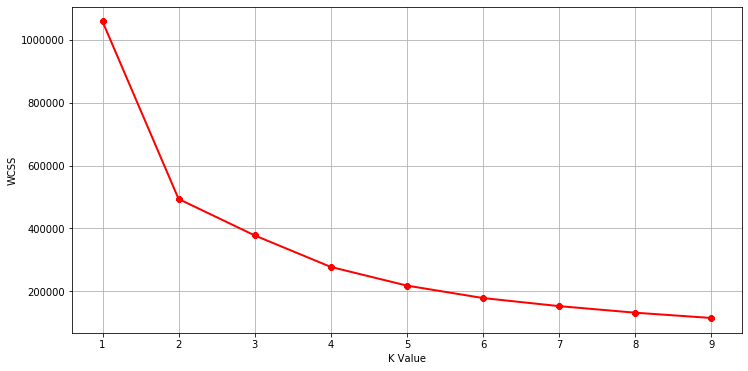

In [171]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cc)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.show()


####  So 4 is the optimal K value

In [172]:
km = KMeans(n_clusters=4)
clusters=km.fit_predict(cc)
cc["label"] = clusters


/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
counts=cc["label"].value_counts()

In [174]:
counts

3    289
0    255
2    251
1    205
Name: label, dtype: int64

In [177]:
cc.groupby('label').mean()


,past_3_years_bike_related_purchases,age
label,,
0,84.592157,50.952941
1,48.985366,66.751220
2,54.900398,33.924303
3,15.373702,48.422145


In [181]:
cc['label'].replace({2:'Potential loyalty customers',0:'potential best Customers',3:'Non-Target Customers',1:'potential customers'},inplace=True)

In [185]:
cc.label.value_counts()

Non-Target Customers           289
potential best Customers       255
Potential loyalty customers    251
potential customers            205
Name: label, dtype: int64

In [188]:
non_target=cc.loc[cc.label=='Non-Target Customers']
potential_best=cc.loc[cc.label=='potential best Customers']
potential_customers=cc.loc[cc.label=='potential customers']
potential_loyalty=cc.loc[cc.label=='Potential loyalty customers']

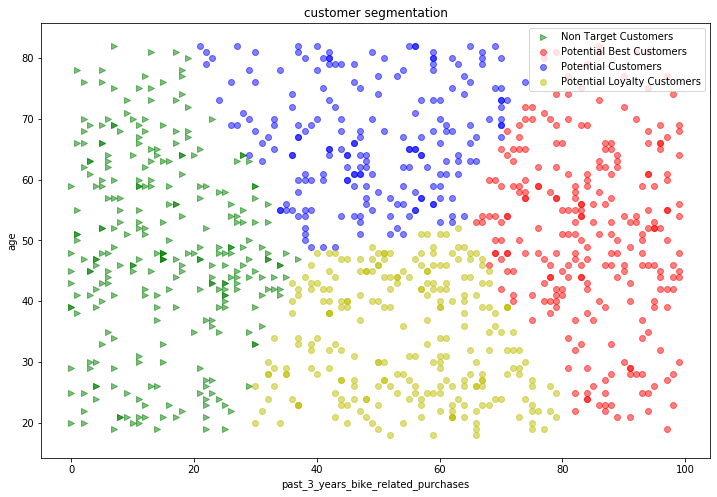

In [189]:
plt.figure(figsize=(12,8))
plt.scatter(non_target.past_3_years_bike_related_purchases,non_target.age,alpha=0.5,label='Non Target Customers',marker='>',color='g')
plt.scatter(potential_best.past_3_years_bike_related_purchases,potential_best.age,alpha=0.5,label='Potential Best Customers',color='r')
plt.scatter(potential_customers.past_3_years_bike_related_purchases,potential_customers.age,alpha=0.5,label='Potential Customers',color='b')
plt.scatter(potential_loyalty.past_3_years_bike_related_purchases,potential_loyalty.age,alpha=0.5,label='Potential Loyalty Customers',color='y')
plt.title('customer segmentation')
plt.xlabel("past_3_years_bike_related_purchases")
plt.ylabel('age')
plt.legend(loc='upper right')
plt.show()